# Machine Learning

### Devoir - Big Data et analyse de données

In [270]:
!pip install xlrd

In [271]:
!pip list | grep xl

openpyxl                           3.0.0    
xlrd                               1.2.0    
xlwings                            0.15.10  
xlwt                               1.3.0    


In [272]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "theNotebook = " + "'"+attribs['data-notebook-name'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [273]:
# Packages génériques
import sys
import os
import importlib
import numpy as np  # Calcul numérique
import pandas as pd  # Données au format tabulaire, transformation et analyse de données

# Graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl  # pour afficher le numéro de version logicielle

In [274]:
# Vérification d'un niveau de version
assert sys.version[:3] >= "3.7"      # Python 3.7
assert np.__version__[:4] >= "1.16"  # NumPy 1.16
assert pd.__version__[:4] >= "0.23"  # Pandas 0.23

In [275]:
print("[Python] : version ", sys.version)
print()
print("[Numpy] : version ", np.__version__)
print("[Pandas] : version ", pd.__version__)
print("[Matplotlib] : version ", mpl.__version__)
print("[Seaborn] : version ", sns.__version__)

[Python] : version  3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]

[Numpy] : version  1.16.5
[Pandas] : version  0.25.1
[Matplotlib] : version  3.1.1
[Seaborn] : version  0.9.0


In [276]:
### Configuration des DataFrames Pandas

In [277]:
# Pour maximiser les options d'affichage du contenu des DF Pandas
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_colwidth", 1000)
pd.set_option('display.width', 1000)

In [278]:
#Liste des colonnes de référence à transformer pour uniformiser le nommage des attributs du DF définissant la matrice des variables
DICT_REF_COLS = {"APP_Libelle_etablissement": "lb_etab",
                "SIRET": "siret",
                "Adresse_2_UA": "adresse",
                "Code_postal": "cd_postal",
                "Libelle_commune": "lb_commune",
                "Date_inspection" :"annee",
                "APP_Libelle_activite_etablissement": "lb_activite_etab",
                "Synthese_eval_sanit" : "synthese",
                "filtre" : "job",
                "ods_type_activite" : "type_activite"
               }

# Dictionnaire des types de données des colonnes de référence
DICT_TYPE_REF_COLS = {"lb_etab": str,   # attribut "Code département"
                      "siret": str,  # attribut "circonscription"
                      "adresse": str,   # attribut "Inscrits"
                      "cd_postal": int,   # attribut "Votants"
                      "lb_commune": str,
                      "annee": int, # attribut "Exprimés"
                      "lb_activite_etab": str,
                      "synthese": str, # attribut "Exprimés"
                      "job": str,
                      "type_activite": str
                     }  # nouvel attribut portant sur le tour des élections

In [279]:
## 1.1 Chargement des données dans un DataFrame Pandas

In [306]:
# Initialisation du DF Pandas global de recueil des résultats 
pdf_data = pd.DataFrame()
FILENAME = 'data/data_final_t.csv'

In [307]:
pdf_data = pd.read_csv(FILENAME,sep = ';')

In [308]:
# Liste des colonnes du DataFrame pdf_data
pdf_data.columns

Index(['APP_Libelle_etablissement', 'SIRET', 'Adresse_2_UA', 'Code_postal', 'Libelle_commune', 'Numero_inspection', 'Date_inspection', 'APP_Libelle_activite_etablissement', 'Synthese_eval_sanit', 'Agrement', 'geores', 'filtre', 'ods_type_activite'], dtype='object')

In [309]:
# Affichage d'un extrait des premières lignes
pdf_data.head()

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,SARL AUBERGE DU DOUBLE SIX,"3,0121E+13",24 PL GENERAL LECLERC,80220.0,GAMACHES,16793484.0,25/04/2023 02:00,Restaurant,Satisfaisant,NaN,"49.985274, 1.561386",Restaurant,Restaurant
1,MONSIEUR PHILIPPE MARIOTTE,"3,10849E+13",286 RUE DU CENTRE,74260.0,LES GETS,16740394.0,23/02/2023 01:00,Restaurant,Satisfaisant,NaN,"46.15861, 6.677963",Restaurant,Restaurant
2,NATURALIA (NATURALIA FRANCE),"3,02475E+13",36 RUE EUGENE EICHENBERGER,92800.0,PUTEAUX,16611978.0,04/10/2022 02:00,Alimentation générale,Satisfaisant,NaN,"48.881317, 2.23746",Alimentation générale,Alimentation générale
3,SUPER-U (COLOMBELLES DISTRIBUTION),"3,01224E+13",RD 403,14460.0,COLOMBELLES,16787460.0,20/04/2023 02:00,Rayon boucherie-charcuterie,Très satisfaisant,NaN,NaN,Rayon boucherie-charcuterie,Rayon boucherie-charcuterie
4,FRANPRIX (SOC DISTRIBUTION SODISCO SARL),"3,34271E+13","4, PLACE DU MOUSTIER",92210.0,SAINT CLOUD,16748988.0,08/03/2023 01:00,Alimentation générale,A améliorer,NaN,"48.844091, 2.219818",Alimentation générale,Alimentation générale


In [310]:
pdf_data.dtypes

APP_Libelle_etablissement              object
SIRET                                  object
Adresse_2_UA                           object
Code_postal                           float64
Libelle_commune                        object
Numero_inspection                     float64
Date_inspection                        object
APP_Libelle_activite_etablissement     object
Synthese_eval_sanit                    object
Agrement                               object
geores                                 object
filtre                                 object
ods_type_activite                      object
dtype: object

In [311]:
# Supprimer les colonnes
pdf_data = pdf_data.drop(columns=['geores', 'Agrement','Numero_inspection'])

In [312]:
# Convertir la colonne 'Date_inspection' en objet DateTime en utilisant le nouveau format
pdf_data['Date_inspection'] = pd.to_datetime(pdf_data['Date_inspection'], format='%d/%m/%Y %H:%M', errors='coerce')

# Extraire l'année dans une nouvelle colonne 'Year'
pdf_data['Year'] = pdf_data['Date_inspection'].dt.year


In [313]:
# Convertir la colonne 'Date_inspection' en objet DateTime sans prendre en compte le fuseau horaire
pdf_data['Date_inspection'] = pd.to_datetime(pdf_data['Date_inspection'], format='%Y-%m-%dT%H:%M:%S', errors='coerce',utc=True)

# Convertir la colonne 'Date_inspection' en objet DateTime en prenant en compte le fuseau horaire
pdf_data['Date_inspection'] = pd.to_datetime(pdf_data['Date_inspection'], format='%Y-%m-%dT%H:%M:%S%z')

# Extraire l'année dans une nouvelle colonne 'Year'
pdf_data['Year'] = pdf_data['Date_inspection'].dt.year



In [314]:
pdf_data

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,filtre,ods_type_activite,Year
0,SARL AUBERGE DU DOUBLE SIX,"3,0121E+13",24 PL GENERAL LECLERC,80220.0,GAMACHES,2023-04-25 02:00:00+00:00,Restaurant,Satisfaisant,Restaurant,Restaurant,2023
1,MONSIEUR PHILIPPE MARIOTTE,"3,10849E+13",286 RUE DU CENTRE,74260.0,LES GETS,2023-02-23 01:00:00+00:00,Restaurant,Satisfaisant,Restaurant,Restaurant,2023
2,NATURALIA (NATURALIA FRANCE),"3,02475E+13",36 RUE EUGENE EICHENBERGER,92800.0,PUTEAUX,2022-10-04 02:00:00+00:00,Alimentation générale,Satisfaisant,Alimentation générale,Alimentation générale,2022
3,SUPER-U (COLOMBELLES DISTRIBUTION),"3,01224E+13",RD 403,14460.0,COLOMBELLES,2023-04-20 02:00:00+00:00,Rayon boucherie-charcuterie,Très satisfaisant,Rayon boucherie-charcuterie,Rayon boucherie-charcuterie,2023
4,FRANPRIX (SOC DISTRIBUTION SODISCO SARL),"3,34271E+13","4, PLACE DU MOUSTIER",92210.0,SAINT CLOUD,2023-03-08 01:00:00+00:00,Alimentation générale,A améliorer,Alimentation générale,Alimentation générale,2023
...,...,...,...,...,...,...,...,...,...,...,...
32715,EARL TOUT LE BON,"9,045E+13",LE PLATE,97424.0,Saint-Leu,2023-03-30 02:00:00+00:00,Chaîne d'abattage de volaille/lagomorphe/petit gibier,Satisfaisant,Abattoirs,NaN,2023
32716,LA POKETERIE,"8,44751E+13",3 RUE DE PROVENCE,75009.0,Paris 9e Arrondissement,2022-11-24 01:00:00+00:00,Restaurant,Satisfaisant,NaN,NaN,2022
32717,SAS GUY COQUILLAT,"3,88539E+13",Z A Les Blaches Gombert,4160.0,Château-Arnoux-Saint-Auban,2023-04-17 02:00:00+00:00,Transformation de produits carnés,Satisfaisant,Viandes et produits carnés,NaN,2023
32718,LIVESTATION DIY,"7,51699E+13",LIVESTATION DIY,69007.0,Lyon 7e Arrondissement,2023-06-16 02:00:00+00:00,Restaurant,Satisfaisant,Restaurant,NaN,2023


In [315]:
# Supprimer la colonne "job"
pdf_data = pdf_data.drop(columns=['Date_inspection'])

In [316]:
# Renommage des colonnes du DF Pandas à partir des valeurs associées aux clés des dictionnaires définis
# Renommage des colonnes avec le dictionnaire DICT_REF_COLS
pdf_data.rename(columns=DICT_REF_COLS, inplace=True)

# Affichage des premières lignes du DataFrame avec les colonnes renommées
pdf_data.head()

,lb_etab,siret,adresse,cd_postal,lb_commune,lb_activite_etab,synthese,job,type_activite,Year
0,SARL AUBERGE DU DOUBLE SIX,"3,0121E+13",24 PL GENERAL LECLERC,80220.0,GAMACHES,Restaurant,Satisfaisant,Restaurant,Restaurant,2023
1,MONSIEUR PHILIPPE MARIOTTE,"3,10849E+13",286 RUE DU CENTRE,74260.0,LES GETS,Restaurant,Satisfaisant,Restaurant,Restaurant,2023
2,NATURALIA (NATURALIA FRANCE),"3,02475E+13",36 RUE EUGENE EICHENBERGER,92800.0,PUTEAUX,Alimentation générale,Satisfaisant,Alimentation générale,Alimentation générale,2022
3,SUPER-U (COLOMBELLES DISTRIBUTION),"3,01224E+13",RD 403,14460.0,COLOMBELLES,Rayon boucherie-charcuterie,Très satisfaisant,Rayon boucherie-charcuterie,Rayon boucherie-charcuterie,2023
4,FRANPRIX (SOC DISTRIBUTION SODISCO SARL),"3,34271E+13","4, PLACE DU MOUSTIER",92210.0,SAINT CLOUD,Alimentation générale,A améliorer,Alimentation générale,Alimentation générale,2023


In [317]:
pdf_data.dtypes

lb_etab              object
siret                object
adresse              object
cd_postal           float64
lb_commune           object
lb_activite_etab     object
synthese             object
job                  object
type_activite        object
Year                  int64
dtype: object

In [318]:
# Créer une nouvelle liste d'ordre des colonnes en utilisant les noms renommés
nouvel_ordre =['Year']+list(pdf_data.columns.difference(['Year']))

# Réorganiser les colonnes dans le DataFrame pdf_data
pdf_data = pdf_data.reindex(columns=nouvel_ordre)

pdf_data.head(5)


,Year,adresse,cd_postal,job,lb_activite_etab,lb_commune,lb_etab,siret,synthese,type_activite
0,2023,24 PL GENERAL LECLERC,80220.0,Restaurant,Restaurant,GAMACHES,SARL AUBERGE DU DOUBLE SIX,"3,0121E+13",Satisfaisant,Restaurant
1,2023,286 RUE DU CENTRE,74260.0,Restaurant,Restaurant,LES GETS,MONSIEUR PHILIPPE MARIOTTE,"3,10849E+13",Satisfaisant,Restaurant
2,2022,36 RUE EUGENE EICHENBERGER,92800.0,Alimentation générale,Alimentation générale,PUTEAUX,NATURALIA (NATURALIA FRANCE),"3,02475E+13",Satisfaisant,Alimentation générale
3,2023,RD 403,14460.0,Rayon boucherie-charcuterie,Rayon boucherie-charcuterie,COLOMBELLES,SUPER-U (COLOMBELLES DISTRIBUTION),"3,01224E+13",Très satisfaisant,Rayon boucherie-charcuterie
4,2023,"4, PLACE DU MOUSTIER",92210.0,Alimentation générale,Alimentation générale,SAINT CLOUD,FRANPRIX (SOC DISTRIBUTION SODISCO SARL),"3,34271E+13",A améliorer,Alimentation générale


In [319]:
# convertir le code postal en string et supprimer la partie .0
pdf_data['cd_postal'] = pdf_data['cd_postal'].astype(str)
pdf_data['cd_postal'] = pdf_data['cd_postal'].str.split('.').str[0]

In [320]:
# Définir une fonction pour ajouter un zéro au début des valeurs de 4 chiffres
def ajouter_zero(valeur):
    if len(valeur) == 4 and valeur.isdigit():
        return '0' + valeur
    else:
        return valeur

# Appliquer la fonction à la colonne 'cd_postal'
pdf_data['cd_postal'] = pdf_data['cd_postal'].apply(lambda x: ajouter_zero(x))


In [321]:
pdf_data

,Year,adresse,cd_postal,job,lb_activite_etab,lb_commune,lb_etab,siret,synthese,type_activite
0,2023,24 PL GENERAL LECLERC,80220,Restaurant,Restaurant,GAMACHES,SARL AUBERGE DU DOUBLE SIX,"3,0121E+13",Satisfaisant,Restaurant
1,2023,286 RUE DU CENTRE,74260,Restaurant,Restaurant,LES GETS,MONSIEUR PHILIPPE MARIOTTE,"3,10849E+13",Satisfaisant,Restaurant
2,2022,36 RUE EUGENE EICHENBERGER,92800,Alimentation générale,Alimentation générale,PUTEAUX,NATURALIA (NATURALIA FRANCE),"3,02475E+13",Satisfaisant,Alimentation générale
3,2023,RD 403,14460,Rayon boucherie-charcuterie,Rayon boucherie-charcuterie,COLOMBELLES,SUPER-U (COLOMBELLES DISTRIBUTION),"3,01224E+13",Très satisfaisant,Rayon boucherie-charcuterie
4,2023,"4, PLACE DU MOUSTIER",92210,Alimentation générale,Alimentation générale,SAINT CLOUD,FRANPRIX (SOC DISTRIBUTION SODISCO SARL),"3,34271E+13",A améliorer,Alimentation générale
...,...,...,...,...,...,...,...,...,...,...
32715,2023,LE PLATE,97424,Abattoirs,Chaîne d'abattage de volaille/lagomorphe/petit gibier,Saint-Leu,EARL TOUT LE BON,"9,045E+13",Satisfaisant,NaN
32716,2022,3 RUE DE PROVENCE,75009,NaN,Restaurant,Paris 9e Arrondissement,LA POKETERIE,"8,44751E+13",Satisfaisant,NaN
32717,2023,Z A Les Blaches Gombert,04160,Viandes et produits carnés,Transformation de produits carnés,Château-Arnoux-Saint-Auban,SAS GUY COQUILLAT,"3,88539E+13",Satisfaisant,NaN
32718,2023,LIVESTATION DIY,69007,Restaurant,Restaurant,Lyon 7e Arrondissement,LIVESTATION DIY,"7,51699E+13",Satisfaisant,NaN


In [322]:
pdf_data.dtypes

Year                 int64
adresse             object
cd_postal           object
job                 object
lb_activite_etab    object
lb_commune          object
lb_etab             object
siret               object
synthese            object
type_activite       object
dtype: object

In [323]:
# Supprimer toutes les lignes avec des valeurs nulles ou vides
pdf_data = pdf_data.dropna()

# Réindexer le DataFrame après la suppression
pdf_data = pdf_data.reset_index(drop=True)


In [324]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assurez-vous que 'synthese' est de type catégoriel
pdf_data['synthese'] = pdf_data['synthese'].astype('category')

In [325]:

# Sélection des caractéristiques et de la variable cible
features = ['job', 'lb_commune', 'Year','lb_activite_etab','type_activite']
target = 'synthese'

X = pdf_data[features]
y = pdf_data[target]

# Encodage one-hot des caractéristiques catégorielles
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))

# Divisez les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Créez un modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Entraînez le modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluez la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy:.2f}')

# Affichez d'autres métriques telles que le rapport de classification et la matrice de confusion
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Précision du modèle : 0.60
                   precision    recall  f1-score   support

      A améliorer       0.57      0.17      0.27        23
     Satisfaisant       0.61      0.91      0.73        47
Très satisfaisant       0.56      0.29      0.38        17

         accuracy                           0.60        87
        macro avg       0.58      0.46      0.46        87
     weighted avg       0.59      0.60      0.54        87

[[ 4 17  2]
 [ 2 43  2]
 [ 1 11  5]]


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [326]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Charger vos données ici avec les colonnes 'synthese' et 'job'

# Sélectionner les caractéristiques (synthese) et la variable cible (job)
X = pdf_data['synthese']
y = pdf_data['lb_activite_etab']

# Divisez les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un vecteur TF-IDF pour les synthèses
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Vous pouvez ajuster le nombre de fonctionnalités
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Créez un modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Entraînez le modèle
model.fit(X_train_tfidf, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_tfidf)

# Évaluez la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy:.2f}')

# Affichez d'autres métriques telles que le rapport de classification et la matrice de confusion
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Pour faire des prédictions sur de nouvelles synthèses textuelles :
new_synthese = ["Votre nouvelle synthèse textuelle ici."]
new_synthese_tfidf = tfidf_vectorizer.transform(new_synthese)
predicted_job = model.predict(new_synthese_tfidf)
print(f"Le job prédit pour la nouvelle synthèse est : {predicted_job[0]}")


Précision du modèle : 0.52
                             precision    recall  f1-score   support

      Alimentation générale       0.00      0.00      0.00         5
      Boucherie-Charcuterie       0.00      0.00      0.00         2
     Boulangerie-Pâtisserie       0.00      0.00      0.00        29
               Poissonnerie       0.00      0.00      0.00         1
                    Primeur       0.00      0.00      0.00         1
         Producteur fermier       0.00      0.00      0.00         1
Rayon boucherie-charcuterie       0.00      0.00      0.00         2
                 Restaurant       0.52      1.00      0.68        45
    Restauration collective       0.00      0.00      0.00         1

                   accuracy                           0.52        87
                  macro avg       0.06      0.11      0.08        87
               weighted avg       0.27      0.52      0.35        87

[[ 0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [327]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Sélection des caractéristiques et de la variable cible
features = ['lb_commune', 'Year', 'lb_activite_etab', 'type_activite']
target = 'synthese'

X = pdf_data[features]
y = pdf_data[target]

# Encodage one-hot des caractéristiques catégorielles
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))

# Divisez les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Créez un modèle de régression logistique multinomiale
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Entraînez le modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluez la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy:.2f}')

# Affichez le rapport de classification et la matrice de confusion
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Précision du modèle : 0.61
                   precision    recall  f1-score   support

      A améliorer       0.38      0.13      0.19        23
     Satisfaisant       0.64      0.89      0.74        47
Très satisfaisant       0.62      0.47      0.53        17

         accuracy                           0.61        87
        macro avg       0.54      0.50      0.49        87
     weighted avg       0.56      0.61      0.56        87

[[ 3 17  3]
 [ 3 42  2]
 [ 2  7  8]]


In [328]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Sélection des caractéristiques et de la variable cible
features = ['lb_commune', 'Year', 'lb_activite_etab', 'job']
target = 'synthese'

X = pdf_data[features]
y = pdf_data[target]

# Encodage one-hot des caractéristiques catégorielles
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))

# Divisez les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Créez un modèle de régression logistique multinomiale
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Entraînez le modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluez la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy:.2f}')

# Affichez le rapport de classification et la matrice de confusion
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Précision du modèle : 0.62
                   precision    recall  f1-score   support

      A améliorer       0.60      0.13      0.21        23
     Satisfaisant       0.63      0.94      0.75        47
Très satisfaisant       0.58      0.41      0.48        17

         accuracy                           0.62        87
        macro avg       0.60      0.49      0.48        87
     weighted avg       0.61      0.62      0.56        87

[[ 3 17  3]
 [ 1 44  2]
 [ 1  9  7]]


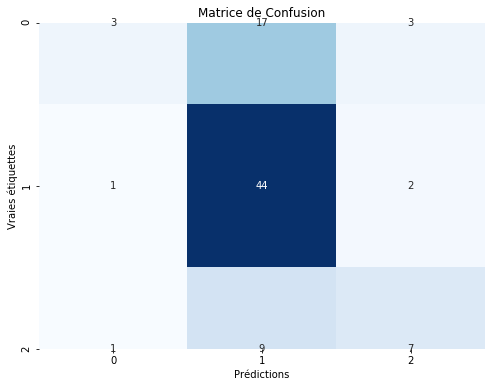

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculez la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)

# Créez une figure
plt.figure(figsize=(8, 6))

# Utilisez Seaborn pour afficher la matrice de confusion sous forme de heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

# Ajoutez des étiquettes aux axes
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')

# Ajoutez des titres
plt.title('Matrice de Confusion')

# Affichez le graphique
plt.show()


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


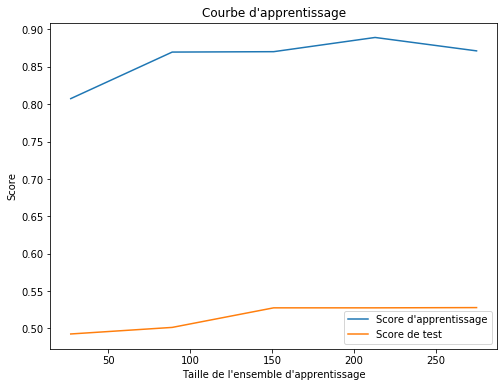

In [330]:
from sklearn.model_selection import learning_curve

# Calculez les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

# Calculez la moyenne des scores d'apprentissage et de test
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Tracez les courbes d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Score d\'apprentissage')
plt.plot(train_sizes, test_scores_mean, label='Score de test')
plt.xlabel('Taille de l\'ensemble d\'apprentissage')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.show()


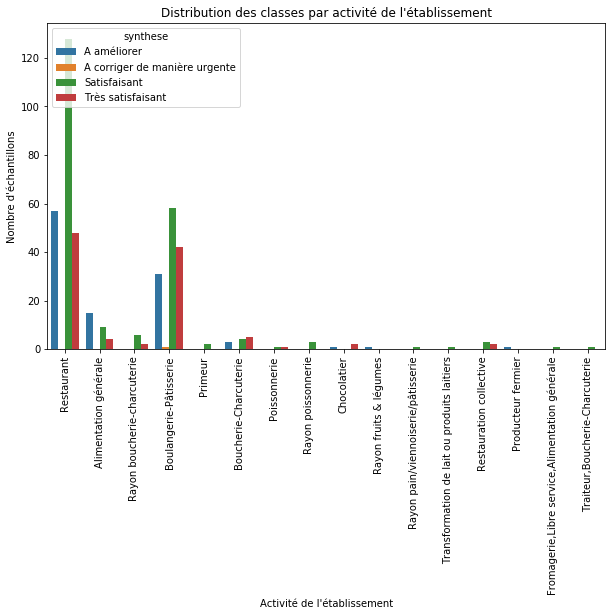

In [331]:
# Exemple de graphique de barres pour la variable 'lb_activite_etab'
plt.figure(figsize=(10, 6))
sns.countplot(x='lb_activite_etab', hue='synthese', data=pdf_data)
plt.xticks(rotation=90)
plt.xlabel('Activité de l\'établissement')
plt.ylabel('Nombre d\'échantillons')
plt.title('Distribution des classes par activité de l\'établissement')
plt.show()


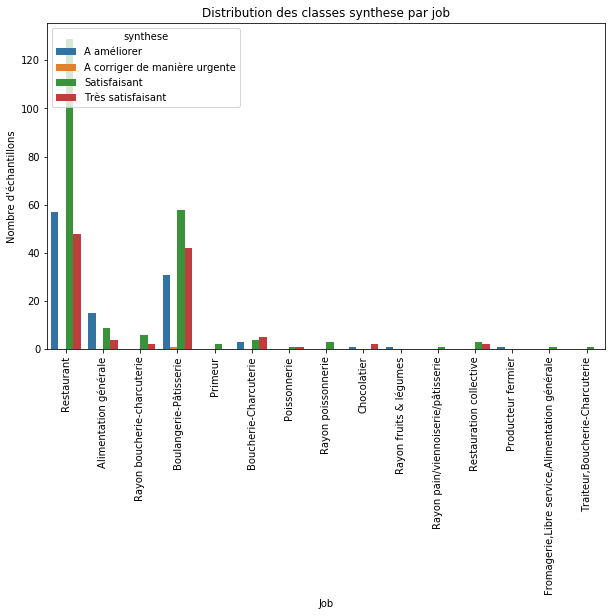

In [332]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de graphique à barres empilées pour la variable 'job' en fonction de 'synthese'
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='synthese', data=pdf_data)
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('Nombre d\'échantillons')
plt.title('Distribution des classes synthese par job')
plt.show()


D:\anaconda\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


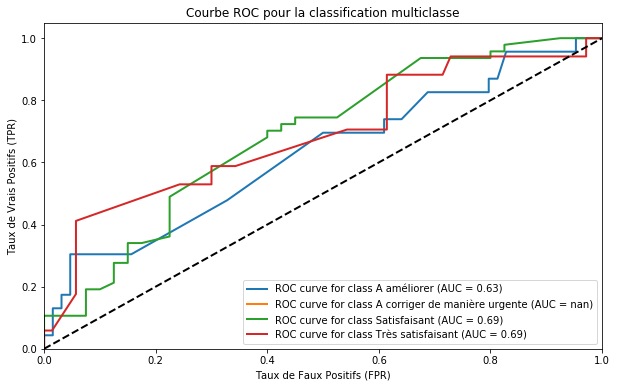

In [333]:
from sklearn.metrics import roc_curve, auc

# Liste des classes
classes = model.classes_

# Calculez la courbe ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()

y_prob = model.predict_proba(X_test)

for i, class_label in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == class_label, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracez les courbes ROC pour chaque classe
plt.figure(figsize=(10, 6))
for i, class_label in enumerate(classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {class_label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC pour la classification multiclasse')
plt.legend(loc='lower right')
plt.show()


In [338]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Sélection des caractéristiques et de la variable cible
features = ['lb_commune', 'Year']
target = 'synthese'

X = pdf_data[features]
y = pdf_data[target]

# Encodage one-hot des caractéristiques catégorielles
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))

# Divisez les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Créez un modèle de régression logistique multinomiale
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Entraînez le modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluez la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy:.2f}')

# Affichez le rapport de classification et la matrice de confusion
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Précision du modèle : 0.61
                   precision    recall  f1-score   support

      A améliorer       0.50      0.09      0.15        23
     Satisfaisant       0.62      0.94      0.75        47
Très satisfaisant       0.58      0.41      0.48        17

         accuracy                           0.61        87
        macro avg       0.57      0.48      0.46        87
     weighted avg       0.58      0.61      0.54        87

[[ 2 18  3]
 [ 1 44  2]
 [ 1  9  7]]


In [339]:
# Exporter le contenu de PDF_FINAL au format Excel
FINAL_FILENAME = 'data_final.xls'
pdf_data.to_excel(FINAL_FILENAME, index=False)

# Ouvrir le fichier Excel exporté et vérifier son contenu
import pandas as pd
df_exported = pd.read_excel(FINAL_FILENAME)
print(pdf_data.head())

   Year                     adresse cd_postal                          job             lb_activite_etab   lb_commune                                   lb_etab        siret           synthese                type_activite
0  2023       24 PL GENERAL LECLERC     80220                   Restaurant                   Restaurant     GAMACHES                SARL AUBERGE DU DOUBLE SIX   3,0121E+13       Satisfaisant                   Restaurant
1  2023           286 RUE DU CENTRE     74260                   Restaurant                   Restaurant     LES GETS                MONSIEUR PHILIPPE MARIOTTE  3,10849E+13       Satisfaisant                   Restaurant
2  2022  36 RUE EUGENE EICHENBERGER     92800        Alimentation générale        Alimentation générale      PUTEAUX              NATURALIA (NATURALIA FRANCE)  3,02475E+13       Satisfaisant        Alimentation générale
3  2023                      RD 403     14460  Rayon boucherie-charcuterie  Rayon boucherie-charcuterie  COLOMBELLES    